In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs) 
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple

lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities): # same thing as for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hanzhong
Processing Record 2 of Set 1 | half moon bay
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | darhan
Processing Record 5 of Set 1 | simeykyne
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | maragogi
Processing Record 8 of Set 1 | noumea
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | charlotte
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | sobolevo
Processing Record 15 of Set 1 | vanavara
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | flin flon
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hanzhong,33.0728,107.0303,82.53,75,64,2.75,CN,2021-08-03 02:27:55
1,Half Moon Bay,37.4636,-122.4286,82.22,68,40,1.01,US,2021-08-03 02:23:01
2,Saskylakh,71.9167,114.0833,71.24,41,22,10.60,RU,2021-08-03 02:27:56
3,Darhan,49.4867,105.9228,61.21,83,100,12.03,MN,2021-08-03 02:27:56
4,Simeykyne,48.3264,39.5337,73.31,50,35,1.52,UA,2021-08-03 02:27:56
5,Rikitea,-23.1203,-134.9692,69.60,57,44,21.00,PF,2021-08-03 02:27:57
6,Maragogi,-9.0122,-35.2225,72.93,89,51,9.19,BR,2021-08-03 02:27:57
7,Noumea,-22.2763,166.4572,76.98,99,0,10.74,NC,2021-08-03 02:27:58
8,Saint-Philippe,-21.3585,55.7679,65.79,67,0,2.28,RE,2021-08-03 02:27:58
9,Charlotte,35.2271,-80.8431,78.57,69,98,3.00,US,2021-08-03 02:23:01


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hanzhong,CN,2021-08-03 02:27:55,33.0728,107.0303,82.53,75,64,2.75
1,Half Moon Bay,US,2021-08-03 02:23:01,37.4636,-122.4286,82.22,68,40,1.01
2,Saskylakh,RU,2021-08-03 02:27:56,71.9167,114.0833,71.24,41,22,10.60
3,Darhan,MN,2021-08-03 02:27:56,49.4867,105.9228,61.21,83,100,12.03
4,Simeykyne,UA,2021-08-03 02:27:56,48.3264,39.5337,73.31,50,35,1.52
5,Rikitea,PF,2021-08-03 02:27:57,-23.1203,-134.9692,69.60,57,44,21.00
6,Maragogi,BR,2021-08-03 02:27:57,-9.0122,-35.2225,72.93,89,51,9.19
7,Noumea,NC,2021-08-03 02:27:58,-22.2763,166.4572,76.98,99,0,10.74
8,Saint-Philippe,RE,2021-08-03 02:27:58,-21.3585,55.7679,65.79,67,0,2.28
9,Charlotte,US,2021-08-03 02:23:01,35.2271,-80.8431,78.57,69,98,3.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting Data

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

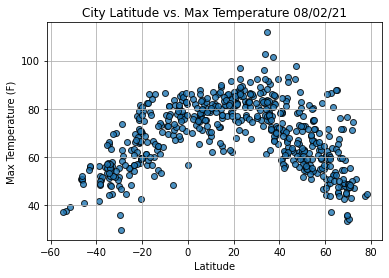

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

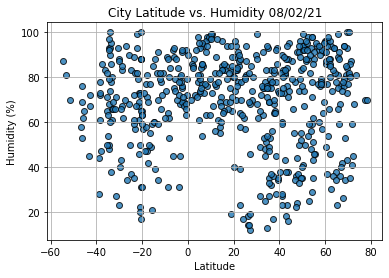

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

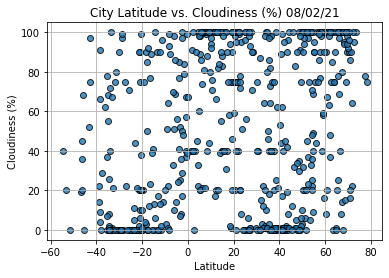

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

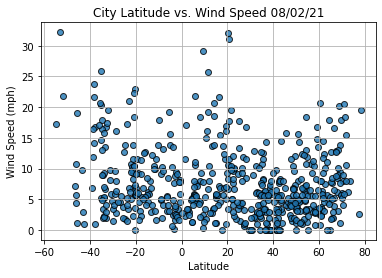

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()